In [1]:
import numpy as np
from functions.wrapper import evaluate_model
from typing import Literal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
state = [0, 1, 2]
means = [[3, 1], [5, 1], [7, 1]]
np.random.seed(0)

n = 9000
y = np.array([np.random.normal(loc=means[s][0], scale=means[s][1], size=n//len(state)) for s in state]).flatten()
np.random.shuffle(y)

x_1 = np.random.uniform(low=1, high=9, size=n)
x_2 = np.random.uniform(low=1, high=9, size=n)
X = np.column_stack((x_1, x_2))

y_test = np.array([2, 3, 4, 5, 6, 7, 8])
x_test = np.array([5, 5, 5, 5, 5, 5, 5])
X_test = np.column_stack((x_test, x_test))

def true_pdf(y_values):
    pdfs = np.mean([norm.pdf(y_values, loc=means[s][0], scale=means[s][1]) for s in range(3)], axis=0)
    return pdfs

# Compute true NLL assuming equal mixture weights
pdfs = true_pdf(y_test)
y_true = -np.log(pdfs)

In [3]:
from gmr.gmm import GMM

x_1 = np.random.uniform(low=0.95, high=1.05, size=n)
X_train = np.hstack((x_1.reshape(-1, 1), np.array(y).reshape(-1, 1)))

gmm = GMM(n_components=3)
gmm.from_samples(X_train)

cond_gmm = gmm.condition(np.array([0]), np.array([1]))  # Condition on intercept
y_vals = np.linspace(0, 10, 100)
pdf_values = cond_gmm.to_probability_density(np.array(y_vals).reshape(-1, 1))

true_pdfs = true_pdf(y_vals)

print(cond_gmm.means)
print(cond_gmm.covariances)


[[3.14824032]
 [6.85761723]
 [5.15827931]]
[[[1.13777905]]

 [[1.15523568]]

 [[1.54026468]]]


In [4]:
# Install scikit-learn if not already installed

from sklearn.mixture import GaussianMixture

n = 9000
y = np.array([np.random.normal(loc=means[s][0], scale=means[s][1], size=n//len(state)) for s in state]).flatten()
np.random.shuffle(y)

gmm_sklearn = GaussianMixture(n_components=3, random_state=0)
gmm_sklearn.fit(y.reshape(-1, 1))
pdf_values_sklearn = np.exp(gmm_sklearn.score_samples(np.array(y_vals).reshape(-1, 1)))

print("Weights:", gmm_sklearn.weights_)
print("Means:", gmm_sklearn.means_)
print("Covariances:", gmm_sklearn.covariances_)

Weights: [0.31511998 0.35086868 0.33401134]
Means: [[2.88969807]
 [6.99777665]
 [4.92049191]]
Covariances: [[[0.81563867]]

 [[0.93831011]]

 [[0.74658302]]]


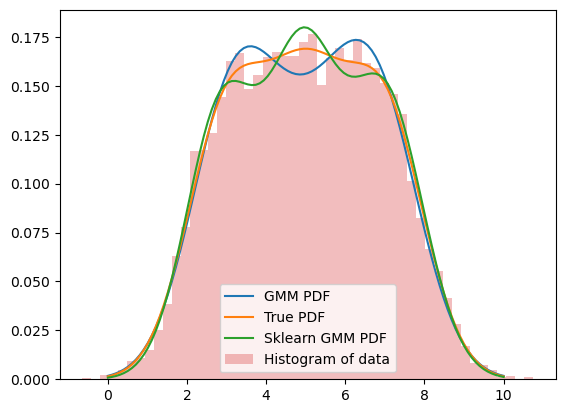

In [5]:
plt.plot(y_vals, pdf_values, label='GMM PDF')
plt.plot(y_vals, true_pdfs, label='True PDF')
plt.plot(y_vals, pdf_values_sklearn, label='Sklearn GMM PDF')
plt.hist(y, bins=50, density=True, alpha=0.3, label='Histogram of data')
plt.legend()

In [6]:
np.sum(pdf_values)

np.float64(9.890186180889271)

In [7]:
np.sum(true_pdfs)

np.float64(9.892491983766648)

In [8]:
np.sum(pdf_values_sklearn)

np.float64(9.895437810920786)